# Productivity Analysis of Garment Workers

In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("garments_worker_productivity.csv")
data.describe() # This drops NaN's in wip automatically

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [12]:
print("Dataset Dimensions: ",data.shape)
data.head()

Dataset Dimensions:  (1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Data Cleaning and Splitting

In [13]:
data.date = pd.to_datetime(data.date) # Converting date to Date-Time format
data.department = data.department.apply(lambda x: x.rstrip()) # Ignoring trailing white-spaces
data.wip = data.wip.apply(lambda x: (0 if np.isnan(x) else x)) # Converting NaN values to 0 because 50% of data is missing. 
data["over_time"] = (data["over_time"]/60)/data["no_of_workers"]
data["incentive"] = data["incentive"]/data["no_of_workers"] # Incentive is too high to be inc=dividual. 
# Therefore, it's probably team level incentive. Thus, dividing by no_of_workers
data["smv"] = data["smv"]
data["idle_time"] = data["idle_time"] 
# data.over_time = data.apply(lambda row: ((row["over_time"]/60)/row["no_of_workers"]), axis=1)
data.department = data.department.apply(lambda x: ("sewing" if x == "sweing" else x))


In [14]:
finishing = data[data["department"] == "finishing"]
finishing = finishing[["date","quarter",
                        # "day",
                        "team",
                        "smv",
                        "over_time",
                        "incentive",
                        # "incentive_per_worker",
                        # "idle_time",
                        "no_of_workers",
                        "actual_productivity",
                        "targeted_productivity"]]
finishing.to_csv("./finishing.csv", index=False)

In [16]:
sweing = data[data["department"] == "sewing"]
sweing = sweing[["date","quarter",
                        # "day",
                        "team",
                        "smv",
                        "over_time",
                        "incentive",
                        # "incentive_per_worker",
                        # "idle_time",
                        "no_of_workers",
                        "actual_productivity",
                        "targeted_productivity"]]
sweing.to_csv("./sewing.csv", index=False)

In [43]:
print(data[["team","department"]].drop_duplicates().sort_values(by = "team").shape)
data[["team","department"]].drop_duplicates().sort_values(by = "team").head()

(24, 2)


,team,department
1,1,finishing
9,1,sweing
8,2,sweing
6,2,finishing
22,3,finishing


In [44]:
# Each team number exists in both department.
# So, Merging both to create a unique team

data["team_id"] = data["department"] + data["team"].apply(lambda i: f'{i:02d}')
team_ids = list(sorted(data["team_id"].unique()))
print("Number of Teams: ",len(team_ids))
data.head()

Number of Teams:  24


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,over_time_per_worker,team_id
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2.000000,sweing08
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,2.000000,finishing01
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2.000000,sweing11
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2.000000,sweing12
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0.571429,sweing06


# Tasks

## EDA

Impact of different variables on the productivity of workers. For Example :

- Distribution of productivity over different quarters of the month
- Which department seems to be the most productive
- Does the team size increase or decrease productivity
- Is incentive the primary motivator towards productivity of workers?

## Model Fitting

Regression / Classification on the dataset :

- Apply the various machine learning models, to predict the productivity of workers
- We could potentially apply a model that could categorize the “environment” as highly productive / moderately productive / low productivity

# Distribution of Productivity over different quaters of the month

In [45]:
df = data.groupby(["department","quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df

<ipython-input-45-5332dba34660>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["department","quarter"])["targeted_productivity","actual_productivity"].agg("mean")


targeted_productivity  actual_productivity
department quarter                                             
finishing  Quarter1               0.747315             0.758482
           Quarter2               0.738435             0.764824
           Quarter3               0.741358             0.735793
           Quarter4               0.721759             0.713400
           Quarter5               0.723810             0.900174
sweing     Quarter1               0.741801             0.746671
           Quarter2               0.727128             0.727200
           Quarter3               0.708527             0.685272
           Quarter4               0.708929             0.705725
           Quarter5               0.713043             0.758615

<AxesSubplot:title={'center':'Sewing'}, xlabel='quarter'>

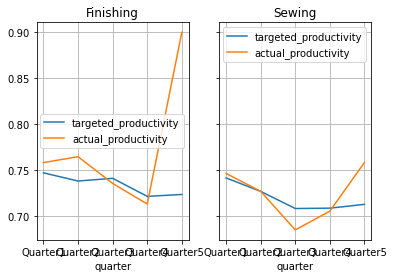

In [46]:
fig, ax = plt.subplots(1,2, sharey=True, sharex=True)
df.loc["finishing",:].plot(ax=ax[0],title='Finishing', grid=True)
df.loc["sweing",:].plot(ax=ax[1],title='Sewing', grid=True)

# Productivity v/s Quaters per team

In [47]:
data["targeted_productivity"].corr(data["actual_productivity"])

0.42159388370015055

In [48]:
df = data.groupby(["team_id","quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df.head()

<ipython-input-48-58b1894a3fd5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["team_id","quarter"])["targeted_productivity","actual_productivity"].agg("mean")


targeted_productivity  actual_productivity
team_id     quarter                                             
finishing01 Quarter1               0.750000             0.804149
            Quarter2               0.787500             0.860675
            Quarter3               0.762500             0.848522
            Quarter4               0.677778             0.788581
            Quarter5               0.750000             0.912767

Correlation for team finishing01 :  0.579578940333508
Correlation for team finishing02 :  0.6033978025965804
Correlation for team finishing03 :  0.666531164691332
Correlation for team finishing04 :  0.25355088058314806
Correlation for team finishing05 :  0.8949129149388672
Correlation for team finishing06 :  -0.6371799488913147
Correlation for team finishing07 :  -0.09940830971094387
Correlation for team finishing08 :  -0.437433628393589
Correlation for team finishing09 :  0.34887732844226
Correlation for team finishing10 :  0.5133204739732085
Correlation for team finishing11 :  -0.03635586560888778
Correlation for team finishing12 :  0.7723789087231674
Correlation for team sweing01 :  0.9571316286745973
Correlation for team sweing02 :  0.9201239458001207
Correlation for team sweing03 :  0.8395282101074214
Correlation for team sweing04 :  0.9566216820538205
Correlation for team sweing05 :  0.4527800593205921
Correlation for team sweing06 :  0.9892812013745427
Correlation for team swein

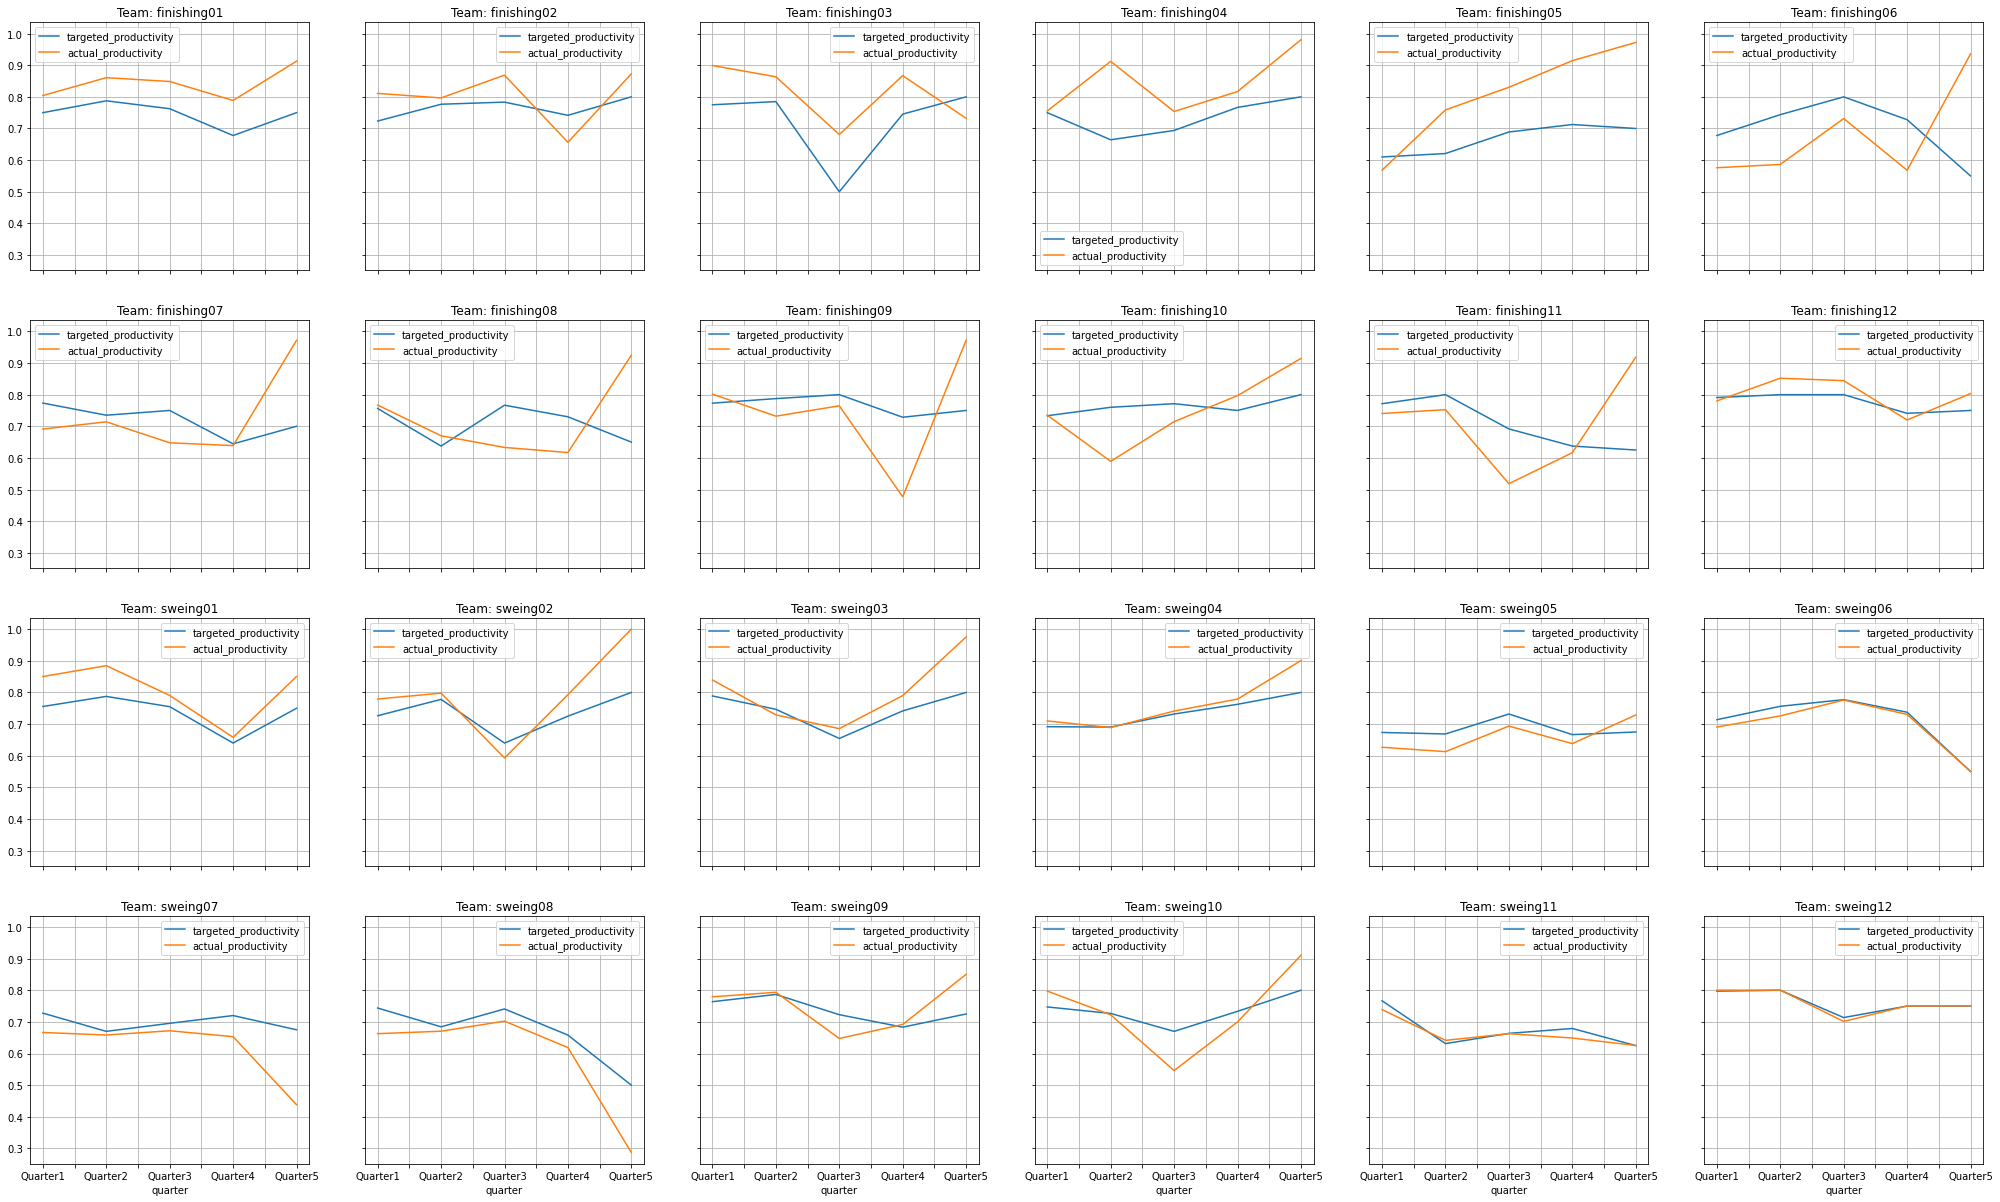

In [49]:
fig, ax = plt.subplots(4,6, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,len(team_ids)+1):
    t = df.loc[team_ids[team-1],:]
    t.plot(ax=ax[((team-1)//6),((team-1)%6)],title='Team: '+team_ids[team-1], grid=True)
    print("Correlation for team",team_ids[team-1],": ",t["targeted_productivity"].corr(t["actual_productivity"]))

# Top teams based on actual productivity
# Difference b/w target & actual productivity and which teams are not meeting it 

# Productivity per team

In [50]:
df = data.groupby(["team_id"])["targeted_productivity","actual_productivity"].agg("mean")
df.head()

<ipython-input-50-c5cc8331eb11>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["team_id"])["targeted_productivity","actual_productivity"].agg("mean")


,targeted_productivity,actual_productivity
team_id,,
finishing01,0.750000,0.827803
finishing02,0.752885,0.780130
finishing03,0.740541,0.847327
finishing04,0.718478,0.820643
finishing05,0.660000,0.791600


AttributeError: 'numpy.float64' object has no attribute 'corr'

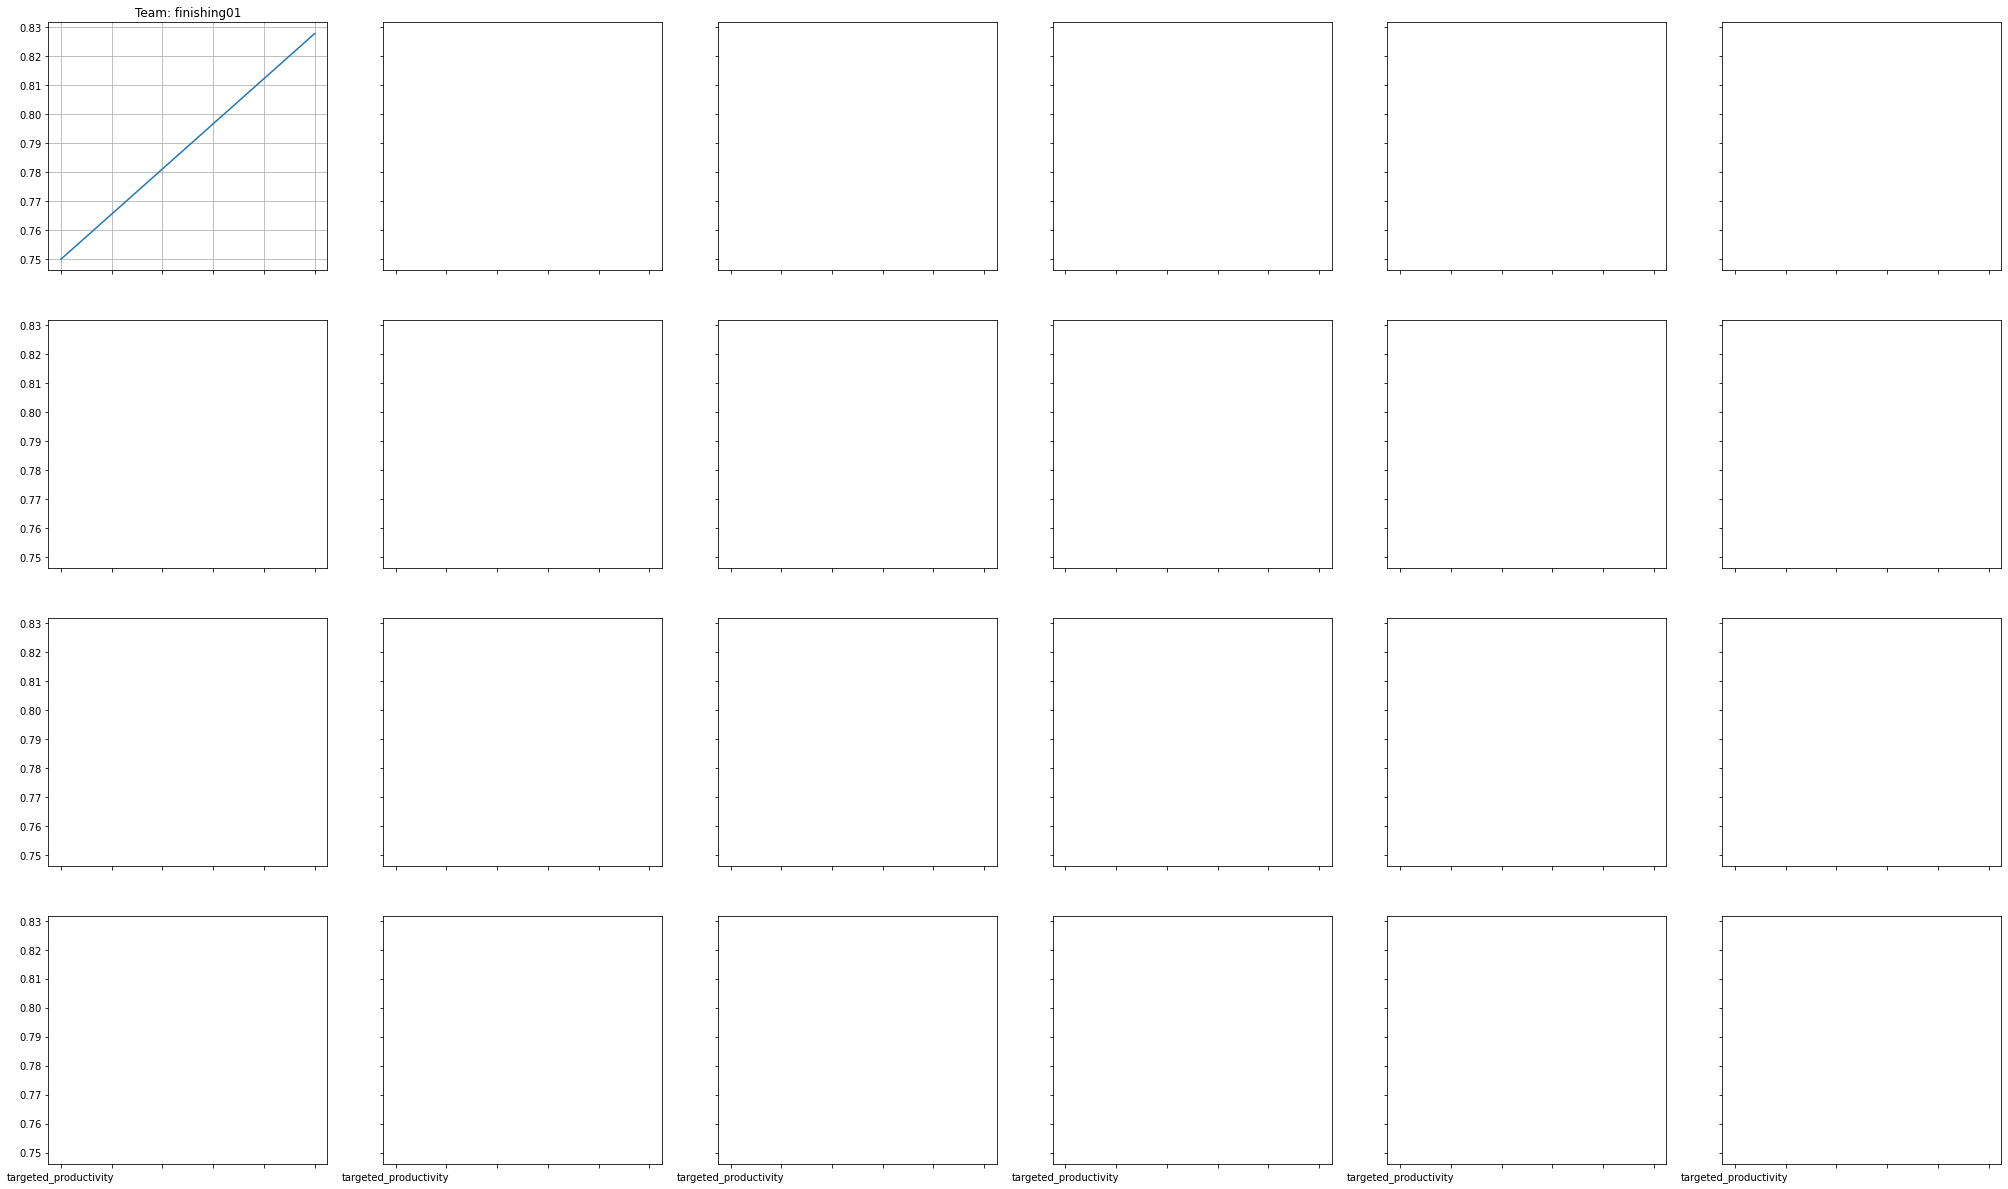

In [51]:
fig, ax = plt.subplots(4,6, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,len(team_ids)+1):
    t = df.loc[team_ids[team-1]]
    t.plot(ax=ax[((team-1)//6),((team-1)%6)],title='Team: '+team_ids[team-1], grid=True)
    print("Correlation for team",team_ids[team-1],": ",t["targeted_productivity"].corr(t["actual_productivity"]))

In [ ]:
# is wip is a factor for low correlation??

# Inference

- Team 12 is by far the most consistent
- There is a general downward trend in productivity 

# Incentive v/s Quarters per team

In [53]:
# Incentive correation with actual productivity is very low
data["incentive"].corr(data["actual_productivity"])

0.07653762727386515

No incentive:  


(array([1.187e+03, 0.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  360.,  720., 1080., 1440., 1800., 2160., 2520., 2880.,
        3240., 3600.]),
 <BarContainer object of 10 artists>)

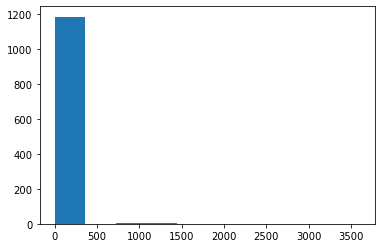

In [54]:
print("No incentive: ", "")
hist(data.incentive)

In [55]:
df_incentive = data.groupby(["team","quarter"])["incentive"].agg("sum")
df_incentive.head()

team_id      quarter 
finishing01  Quarter1      0
             Quarter2    960
             Quarter3      0
             Quarter4      0
             Quarter5      0
Name: incentive, dtype: int64

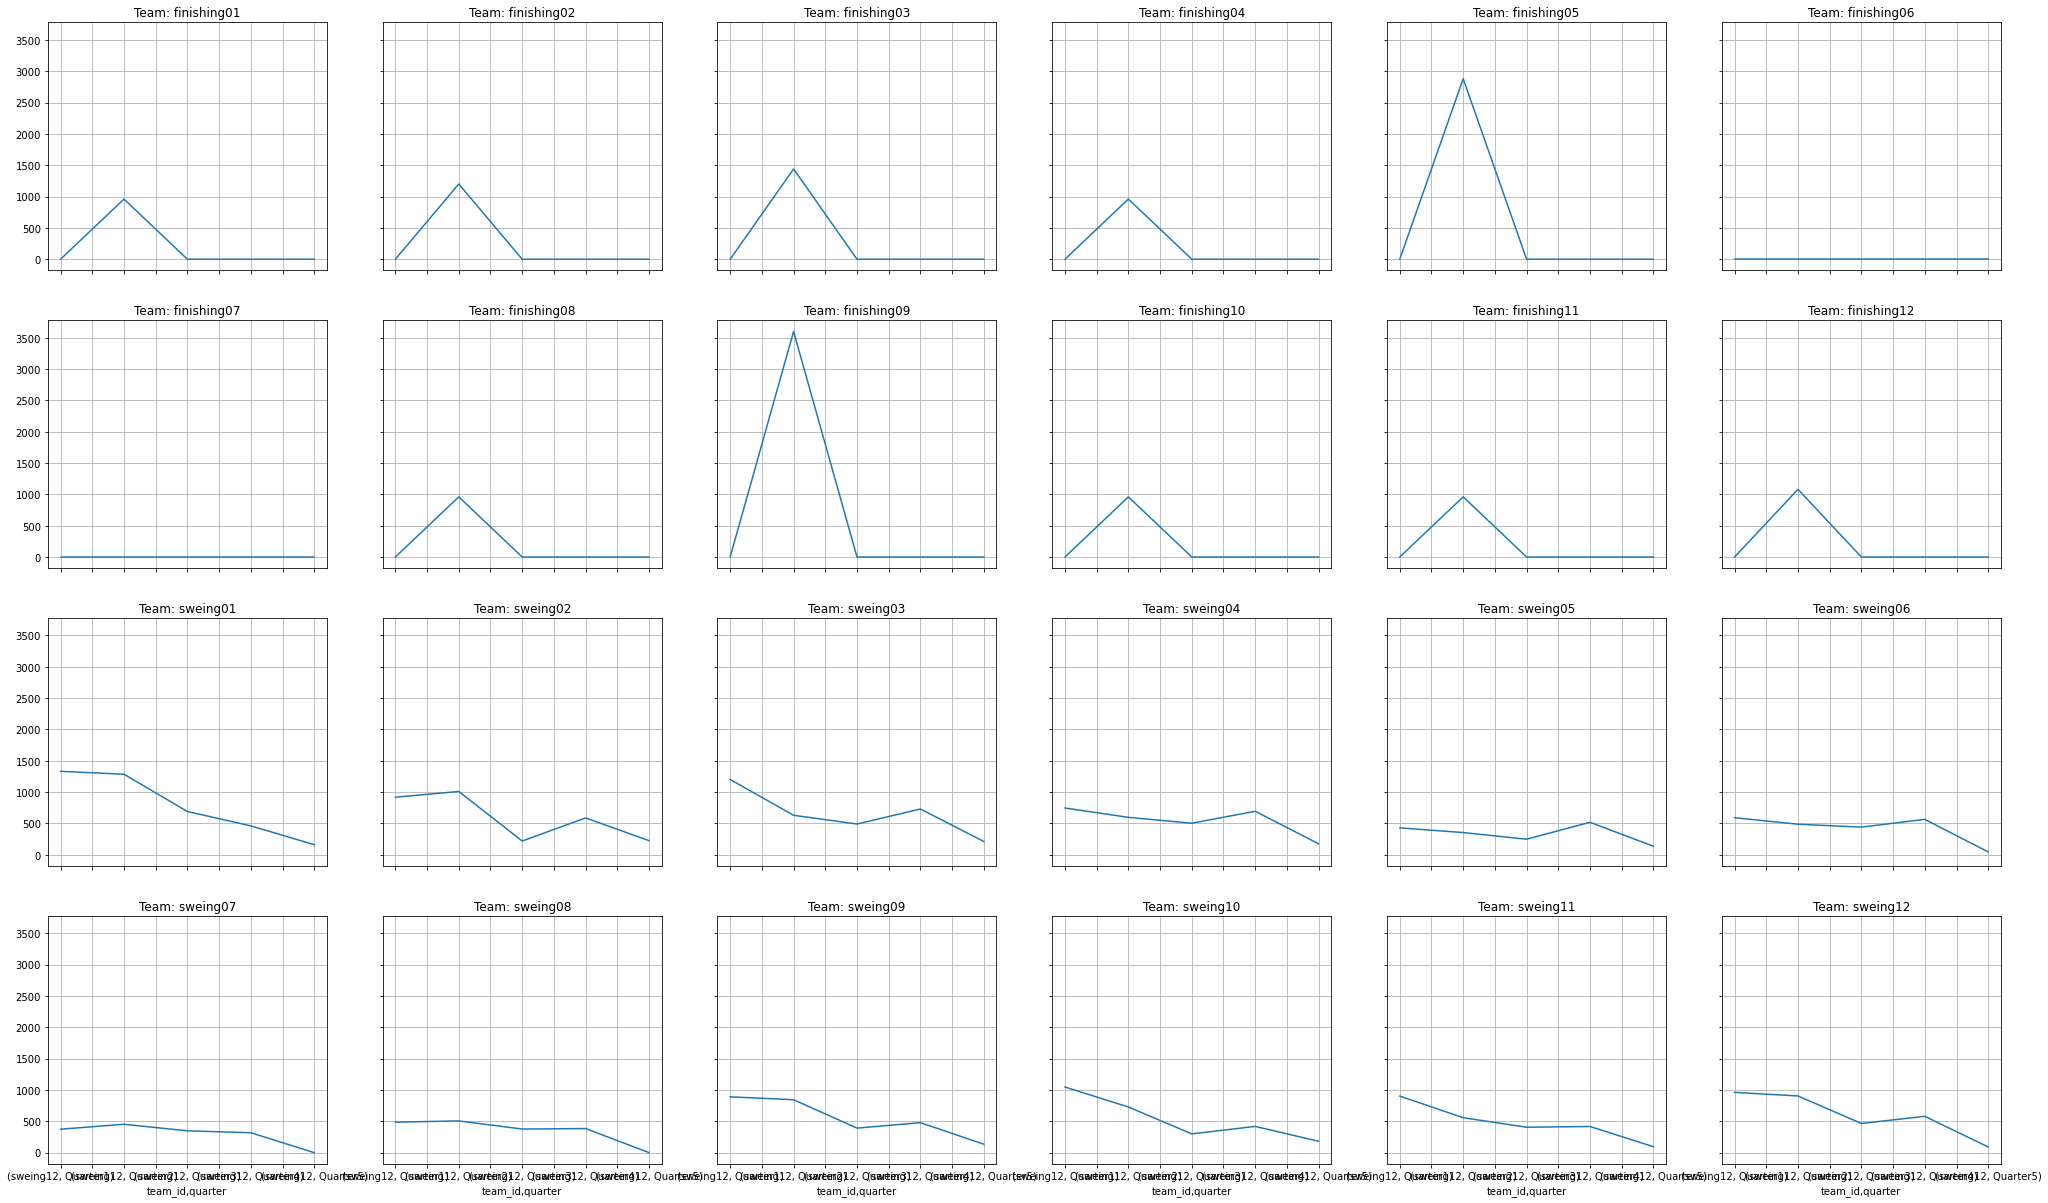

In [56]:
fig, ax = plt.subplots(4,6, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,len(team_ids)+1):
    t = df_incentive.loc[team_ids[team-1],:]
    t.plot(ax=ax[((team-1)//6),((team-1)%6)],title='Team: '+team_ids[team-1], grid=True)

# Team size v/s Productivity

In [ ]:
data[["team_id","no_of_workers","idle_men"]].drop_duplicates().sort_values(by = "team_id")

In [ ]:
df = data[["no_of_workers","actual_productivity","targeted_productivity"]].drop_duplicates().sort_values(by="no_of_workers")
plot(df["no_of_workers"],df["actual_productivity"])
plot(df["no_of_workers"],df["targeted_productivity"])

# The low co-relation proves that the two are largely independent
print("Correlation between Team Size and Actual Productivity: ",df["no_of_workers"].corr(df["actual_productivity"]))

## Quarter

replace Quarter with Week of month. Makes more sense

***

# Wip NaN

In [ ]:
df = data[data["wip"].isna()]
df

In [ ]:
hist(df.actual_productivity)
hist(df.targeted_productivity)

In [ ]:
df.groupby("team")[]